In [2]:
import os
import pandas as pd
from pca import pca
from sklearn.datasets import load_wine

In [3]:
os.chdir('/tscc/projects/ps-palmer/brittany/')

In [4]:
from rare_common_alcohol.notebooks.rca_functions import *

In [5]:
os.chdir('SUD_cross_species/')

In [6]:
nicsa_traits=pd.read_csv('scripts/nicsa_munge_ref/nicsa_traits.csv',sep=',')

In [7]:
gwas_path='nicsa_gwas/mlma/mlma_concat/'

In [8]:
if 'tbl' in globals():
    print('TRUE')

In [10]:
for f in os.listdir(gwas_path):
    if f.endswith('.mlma'):
        label=(f[18: (len(f)-5)])
            
        t=pd.read_csv(gwas_path+f,sep='\t')
        t.columns=['Chr', 'SNP', 'bp', 'A1', 'A2', 'Freq', 'b_'+label, 'se_'+label, 'p_'+label]
        if (label in list(nicsa_traits[nicsa_traits.parallel=='cigday'].trait)):
            print(label +' in cigday')
            if 'tbl_cigday' in globals():
                tbl_cigday=tbl_cigday.merge(t[['SNP','b_'+label, 'se_'+label, 'p_'+label]],on='SNP')
            else:
                tbl_cigday=t
        elif (label in list(nicsa_traits[nicsa_traits.parallel!='cigday'].trait)):
            print(label +' in smkinit')
            if 'tbl_smkinit' in globals():
                tbl_smkinit=tbl_smkinit.merge(t[['SNP','b_'+label, 'se_'+label, 'p_'+label]],on='SNP')
            else:
                tbl_smkinit=t
        else:
            print(label+' not in nicsa traits table')

active_inactive_ratio_first_three_median in smkinit
day1_activelick in smkinit
first_three_days_activelick_total in smkinit
last_three_days_infusion_total in cigday
day10_infusion in cigday
day10_activelick in cigday
active_inactive_ratio_all_days in cigday
total_infusion_10days in cigday
first_three_days_activelick_median in smkinit
last_three_days_activelick_median in cigday
last_three_days_infusion_median in cigday
first_three_days_infusion_median in smkinit
active_inactive_ratio_last_three_median in cigday
day1_infusion in smkinit
first_three_days_infusion_total in smkinit
day1_active_inactive_ratio in smkinit
last_three_days_activelick_total in cigday
total_activelick_10days in cigday
day10_active_inactive_ratio in cigday


In [11]:
df=tbl_smkinit

In [13]:
labels=list(df.columns[df.columns.str.startswith('p_')])
x = df.loc[:, labels].values
y = df.loc[:,['SNP']].values

In [15]:
model = pca(normalize=True)
# Fit transform and include the column labels and row labels
results_smkinit = model.fit_transform(x, col_labels=labels)

[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 7 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

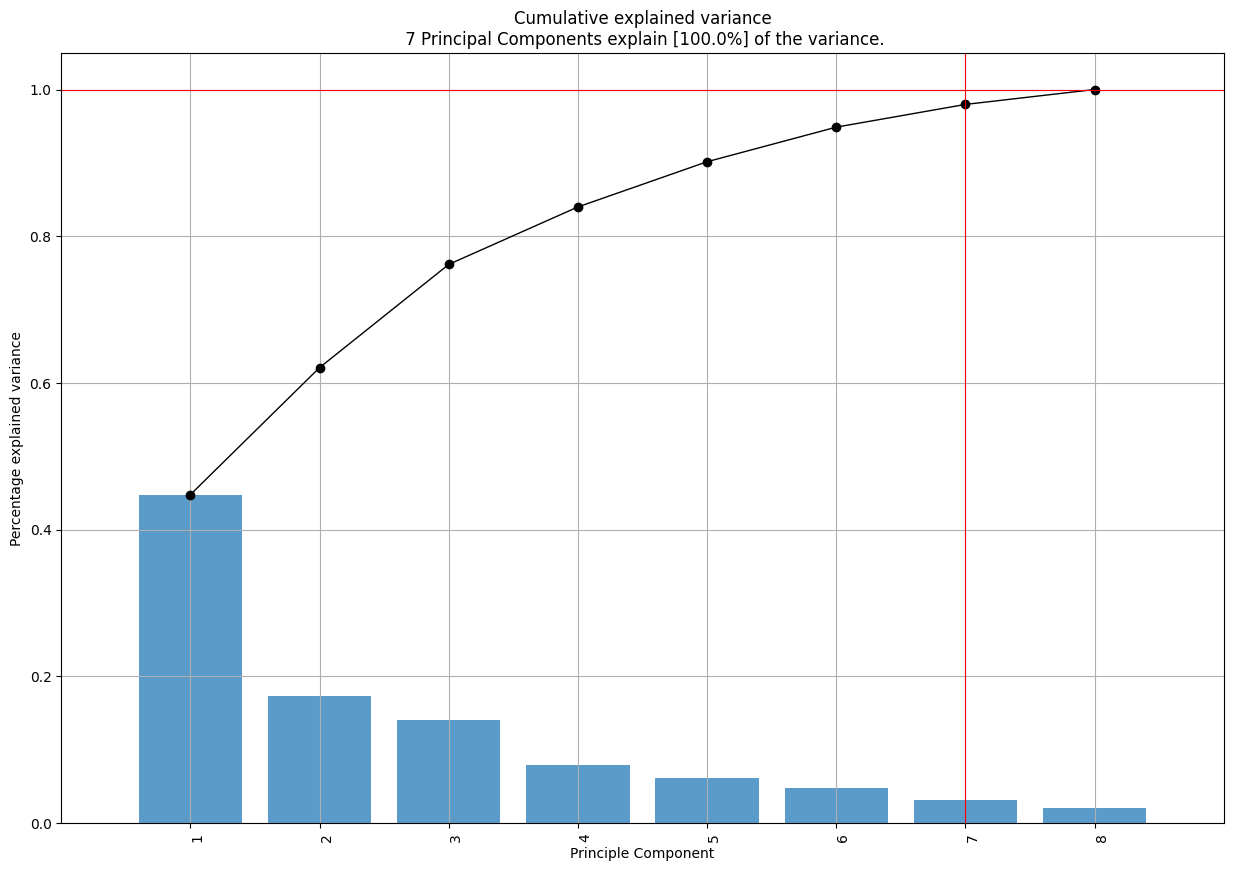

In [18]:
model.plot()

In [ ]:
model.scatter(PC=[0, 1])

In [ ]:
results_smkinit['loadings'].columns=list(df.columns[df.columns.str.startswith('p_')])

In [ ]:
PC=results_smkinit['PC']

In [ ]:
PC['SNP']=df.loc[:,['SNP']].values

In [ ]:
PC=pd.DataFrame(PC)
PC['SNP_trans']=PC['SNP'].map(lambda x: int(x.replace(':','')))


In [ ]:
PC

In [ ]:
plt.figsize(5,20)
plt.scatter(PC.SNP_trans, PC.PC1)


[scatterd] >INFO> Create scatterplot


[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '10 Principal Components explain [97.90%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

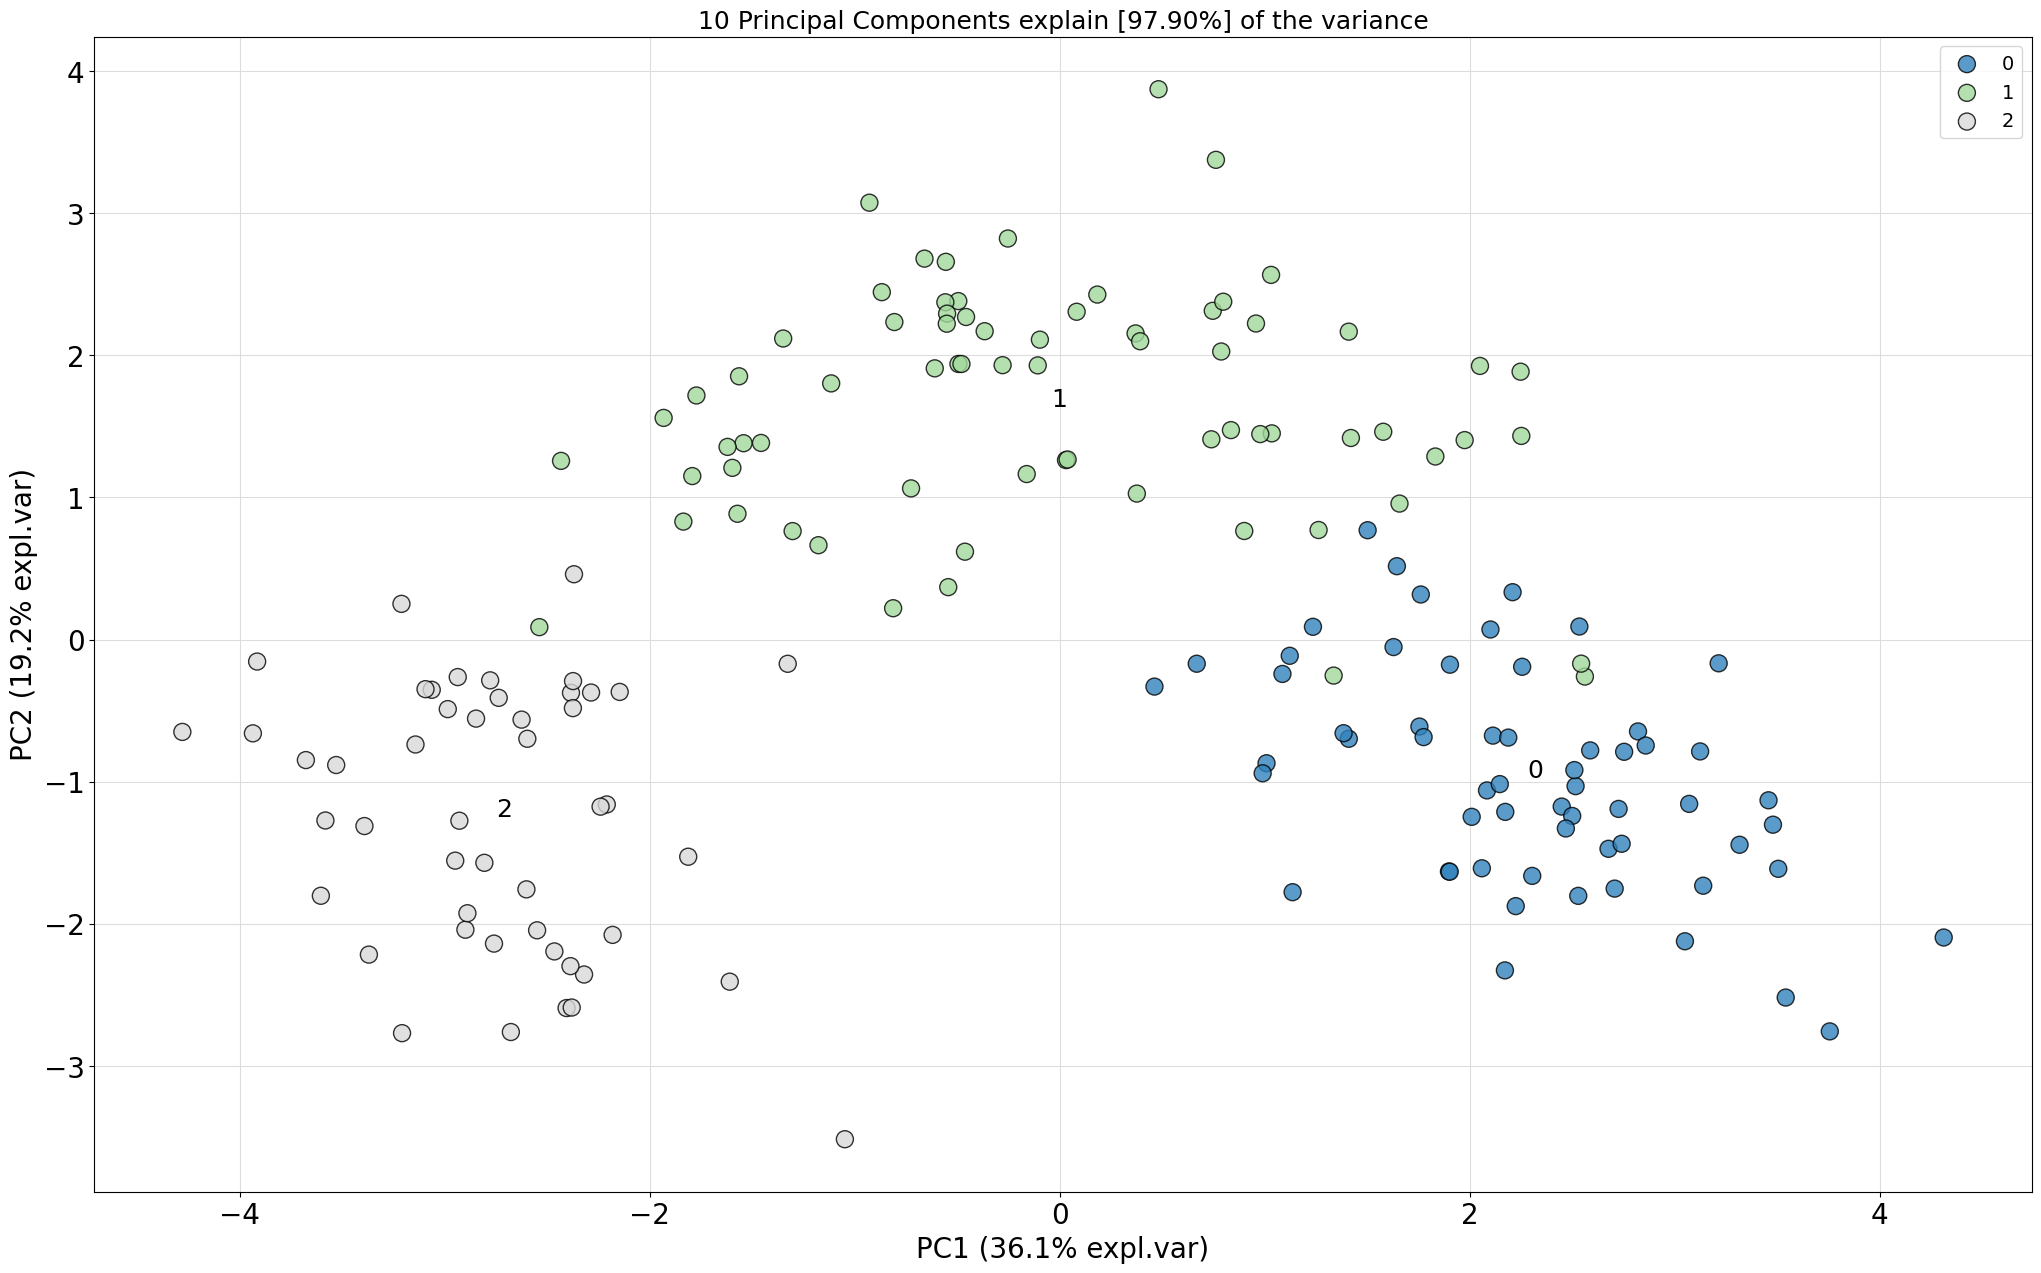

In [146]:
###EXAMPLE

# Load library
from sklearn.datasets import load_wine
# Load dataset
data = load_wine()
X = data.data
Y = data.target
features = data.feature_names

from pca import pca
# Initialize
model = pca(normalize=True)

# Fit transform and include the column labels and row labels
results = model.fit_transform(X, col_labels=features, row_labels=y)
model.scatter(PC=[0, 1])

In [147]:
print(str(type(X)))
print(str(type(Y)))
print(str(type(features)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>


In [165]:
type(Y)

numpy.ndarray

In [166]:
type(y)

numpy.ndarray

In [148]:
print(str(type(x)))
print(str(type(y)))
print(str(type(labels)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>


In [ ]:
model.scatter()

# Make scatterplot
model.scatter(density=True)

# Gradient over the samples. High dense areas will be more colourful.
model.scatter(gradient='#FFFFFF', edgecolor=None)

# Include the outlier detection
model.scatter(SPE=True, density=True)

# Include the outlier detection
model.scatter(HT2=True, density=True)

# Look at different PCs: 1st PC=1  vs PC=3
model.scatter(PC=[0, 2])

In [ ]:
model.scatter()

In [ ]:
# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
df=tbl_smkinit
X = df.SNP
y = data.target
labels = df.columns[df.columns.str.startswith('p_')]

from pca import pca
# Initialize
model = pca(normalize=True)

# Fit transform and include the column labels and row labels
results = model.fit_transform(X, col_labels=labels, row_labels=y)

In [83]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [81]:
df.columns[df.columns.str.startswith('p_')]

Index(['p_active_inactive_ratio_first_three_median', 'p_day1_activelick',
       'p_first_three_days_activelick_total',
       'p_first_three_days_activelick_median',
       'p_first_three_days_infusion_median', 'p_day1_infusion',
       'p_first_three_days_infusion_total', 'p_day1_active_inactive_ratio'],
      dtype='object')

In [76]:
df[df.columns[pd.Series(df.columns).str.startswith('p_')]]

,p_active_inactive_ratio_first_three_median,p_day1_activelick,p_first_three_days_activelick_total,p_first_three_days_activelick_median,p_first_three_days_infusion_median,p_day1_infusion,p_first_three_days_infusion_total,p_day1_active_inactive_ratio
0,0.166801,0.648467,0.998815,0.903704,0.848575,0.874701,0.846711,0.902805
1,0.202847,0.598793,0.745596,0.862397,0.522532,0.798619,0.499974,0.886362
2,0.190072,0.588584,0.759176,0.868079,0.532074,0.804817,0.507917,0.870153
3,0.503251,0.596539,0.743925,0.909139,0.730610,0.699357,0.829662,0.578791
4,0.493289,0.427822,0.878007,0.937523,0.584652,0.499145,0.996424,0.647135
...,...,...,...,...,...,...,...,...
5367082,0.468325,0.635991,0.598772,0.583210,0.295646,0.333258,0.443844,0.729121
5367083,0.468325,0.635991,0.598772,0.583210,0.295646,0.333258,0.443844,0.729121
5367084,0.468325,0.635991,0.598772,0.583210,0.295646,0.333258,0.443844,0.729121
5367085,0.559946,0.590923,0.647332,0.640735,0.333735,0.324402,0.492022,0.841740
